# Project: Investigate (TMDb) Data set for Movies

## Table of Contents
<ul>
<li><a href="#Lib">Libraries</a></li>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="Lib"></a>
## Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import numpy as np
import seaborn as sns


In [9]:
# a function for plots title
def addTitleLabels(xlabel, ylabel,title):
	plt.title(title.title() , fontsize = 14 , weight = 'bold')
	plt.ylabel(ylabel.title(),fontsize=12)
	plt.xlabel(xlabel.title(),fontsize=12)

<a id='intro'></a>
## Introduction



#### tmdb-movies : 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, revenue and other columns that give more details about the movie

Our dependant variables will be revenue and vote_average
Our independent variables will be 1) release_date 2) director 3) geners

Some of the interesting questions about this data set :
#### Dose movie revenue is affected by the month of the rlease then wo focus on specific monthes ? 
#### Is there a relationship between the movie rate and the director of the movie so when i as a producer choose X director i can expect an average rate for the movie ?
#### Does gener of the movie gurantee a specific profit ? 



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
movies = pd.read_csv("/content/drive/MyDrive/Advanced Data Analysis Nano Degree/tmdb-movies.csv")
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [ ]:
movies.genres.value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Western|Action|Drama|Science Fiction          1
History|Drama|Thriller|Crime|Mystery          1
War|Drama|History|Action                      1
Animation|Adventure|Action|Drama|Fantasy      1
Action|Thriller|Science Fiction|Foreign       1
Name: genres, Length: 2039, dtype: int64

In [ ]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

keeping the columns that will be used only

In [5]:
used_columns = ["revenue","budget","director","genres","release_date", "vote_average"]
movies = movies[used_columns]
movies.head(3)

,revenue,budget,director,genres,release_date,vote_average
0,1513528810,150000000,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5
1,378436354,150000000,George Miller,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1
2,295238201,110000000,Robert Schwentke,Adventure|Science Fiction|Thriller,3/18/15,6.3


Dealing with nulls

In [ ]:
is_null = movies.isnull().any(axis = 1) #getting rows contain any null value
movies[is_null]

,revenue,budget,director,genres,release_date
424,0,0,Guido Chiesa,NaN,10/29/15
532,0,0,NaN,Comedy,1/23/15
548,0,0,NaN,Documentary|Science Fiction,8/10/15
556,0,0,NaN,Comedy|Romance,1/24/15
620,0,0,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,10/6/15
...,...,...,...,...,...
9593,0,0,NaN,Action|Adventure|Animation|Family|Fantasy,1/1/88
9799,0,0,David Lynch,NaN,1/1/74
10386,0,0,NaN,Documentary,10/3/93
10426,0,0,NaN,Music,12/25/67


I will remove the nulls of each column only when addressing a question uses this column so i will get to them in each question

release_date need to be a date time not string:

In [7]:
movies.release_date = pd.to_datetime(movies.release_date) #converting the release_date to date time data type instead of object

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   revenue       10866 non-null  int64         
 1   budget        10866 non-null  int64         
 2   director      10822 non-null  object        
 3   genres        10843 non-null  object        
 4   release_date  10866 non-null  datetime64[ns]
 5   vote_average  10866 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 509.5+ KB


Cheking for outliers:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


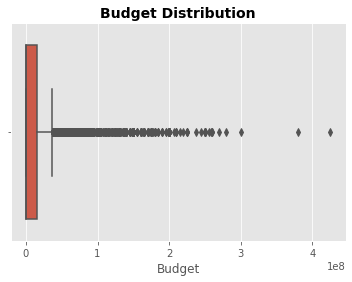

In [12]:
sns.boxplot(movies.budget)
addTitleLabels("budget" , "", "Budget Distribution")

In [ ]:
movies.budget.describe().round(1)

count        10866.0
mean      14625701.1
std       30913213.8
min              0.0
25%              0.0
50%              0.0
75%       15000000.0
max      425000000.0
Name: budget, dtype: float64

In [ ]:
movies.budget.value_counts().sort_values(ascending = False).head(30)

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
30000000     165
5000000      141
40000000     134
35000000     128
12000000     120
50000000     112
6000000      109
8000000      102
3000000      101
60000000      99
7000000       92
4000000       84
2000000       81
18000000      74
1000000       73
70000000      66
11000000      65
45000000      64
80000000      62
13000000      59
17000000      59
14000000      56
22000000      54
3500000       52
75000000      51
Name: budget, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


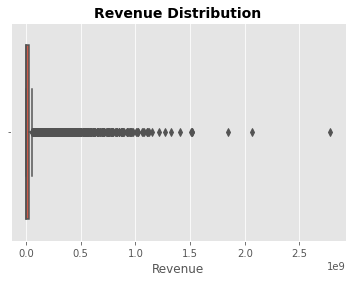

In [14]:
sns.boxplot(movies.revenue)
addTitleLabels("revenue" , "", "revenue Distribution")

In [ ]:
movies.revenue.value_counts().sort_values(ascending = False).head(30)

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
5000000         6
2000000         6
20000000        5
14000000        5
30000000        5
13000000        5
7000000         4
4300000         4
4000000         4
1000000         4
50000000        4
25000000        4
21000000        3
70000000        3
2500000         3
3               3
102000000       3
100000000       3
16              3
29000000        3
16000000        3
11              3
15              3
6700000         3
60000000        3
Name: revenue, dtype: int64

so sadly half of the rows or more have budget or revenue = 0 which is meaningless to me the movie should have any budget and revenue what ever it was so i'm removeing them in a new data frame

i will make a sepcefic data frame for the revenue-budget and profit (money stuff)

In [16]:
print("number of rows: " , movies.shape[0])
movies_money = movies[(movies.budget > 10) & (movies.revenue > 0) ] # the movie should have a budget of at least 10 dollar and have any revenue
print("number of rows: " , movies_money.shape[0])

number of rows:  10866
number of rows:  3845


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


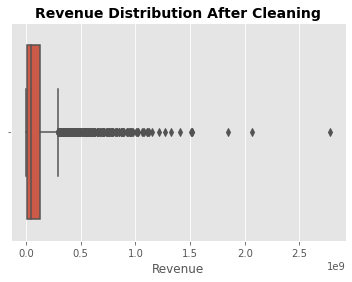

In [17]:
sns.boxplot(movies_money.revenue)
addTitleLabels("revenue" , "", "Revenue Distribution After Cleaning")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


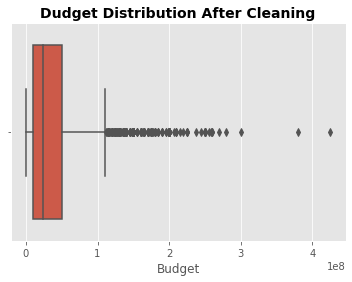

In [18]:
sns.boxplot(movies_money.budget)
addTitleLabels("budget" , "", "Dudget Distribution After Cleaning")

In [19]:
# calculate the movie profit
movies_money["profit"] = movies_money.revenue - movies_money.budget
movies_money.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,revenue,budget,director,genres,release_date,vote_average,profit
0,1513528810,150000000,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,1363528810
1,378436354,150000000,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,228436354
2,295238201,110000000,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,6.3,185238201
3,2068178225,200000000,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,1868178225
4,1506249360,190000000,James Wan,Action|Crime|Thriller,2015-04-01,7.3,1316249360


In [ ]:
movies_money.describe().round(1)

,revenue,budget,profit
count,3.845000e+03,3845.0,3.845000e+03
mean,1.079389e+08,37298582.1,7.064035e+07
std,1.766687e+08,42215034.5,1.507614e+08
min,2.000000e+00,11.0,-4.139124e+08
25%,1.378284e+07,10000000.0,-1.346379e+06
50%,4.523654e+07,24000000.0,2.017943e+07
75%,1.245964e+08,50000000.0,8.200000e+07
max,2.781506e+09,425000000.0,2.544506e+09


In [ ]:
movies.columns

Index(['revenue', 'budget', 'director', 'genres', 'release_date'], dtype='object')

In [ ]:
movies_money[(movies_money.director.isnull())]

,revenue,budget,director,genres,release_date,profit
3276,11000000,4180000,NaN,Drama|Comedy|Romance|Foreign,2008-07-18,6820000


In [20]:
movies_clean = movies_money.drop( movies_money[(movies_money.director.isnull())].index[0] ) #dropping this row with no director
movies_clean[(movies_clean.director.isnull())]

,revenue,budget,director,genres,release_date,vote_average,profit


In [ ]:
movies_clean[(movies_clean.release_date.isnull())] # check for nulls in release_date column

,revenue,budget,director,genres,release_date,profit


In [ ]:
movies_clean[(movies_clean.genres.isnull())] # check for nulls in genres column

,revenue,budget,director,genres,release_date,profit


now the data is clean and ready for explorations

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Dose movie revenue is affected by the month of the rlease then we focus on specific monthes ?)

In [23]:
movies_clean["month"] = movies_clean.release_date.dt.month # extracting the month from the release_date
movies_clean.head()

,revenue,budget,director,genres,release_date,vote_average,profit,month
0,1513528810,150000000,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,1363528810,6
1,378436354,150000000,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,228436354,5
2,295238201,110000000,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,6.3,185238201,3
3,2068178225,200000000,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,1868178225,12
4,1506249360,190000000,James Wan,Action|Crime|Thriller,2015-04-01,7.3,1316249360,4


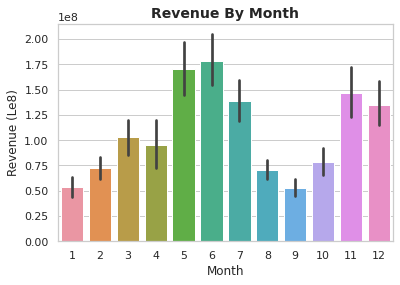

In [47]:
sns.set_theme(style="whitegrid")
sns.barplot(x="month", y="revenue", data = movies_clean)
addTitleLabels("month" , "revenue (le8)", "Revenue by Month")

1e8 is standard scientific notion, and here it indicates an overall scale factor for the y-axis. That is, if there's a 2 on the y-axis and a 1e8 at the top, the value at 2 actually indicates 2*1e8 = 2e8 = 2 * 10^8 = 200,000,000.

It's clear that summer season is the hottest for movies, that movies lunched in monthes (5,6,7) are getting the hieghst revenue. Also after these monthes the revenue start to decerease to reach the minumim revenue at the 9th month

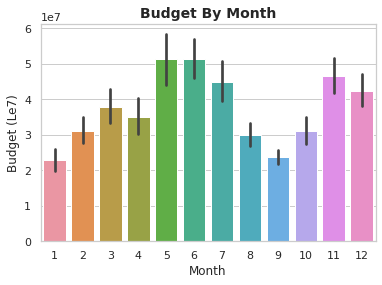

In [43]:
sns.set_theme(style="whitegrid")
sns.barplot(x="month", y="budget", data = movies_clean)
addTitleLabels("month" , "budget (le7)", "Budget by Month")

The budget has the same distribution of revenue

### Research Question 2  (Is there a relationship between the movie rate and the director of the movie so when i as a producer choose X director i can expect an average rate for the movie ?)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   revenue       10866 non-null  int64         
 1   budget        10866 non-null  int64         
 2   director      10822 non-null  object        
 3   genres        10843 non-null  object        
 4   release_date  10866 non-null  datetime64[ns]
 5   vote_average  10866 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 509.5+ KB


Since vote_average contains no nulls and director contains a few i will use the original movies data frame and remove the null rows only in director

In [26]:
movies_rating = movies[["director" , "vote_average"]]
movies_rating.dropna(inplace = True )
movies_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   director      10822 non-null  object 
 1   vote_average  10822 non-null  float64
dtypes: float64(1), object(1)
memory usage: 253.6+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


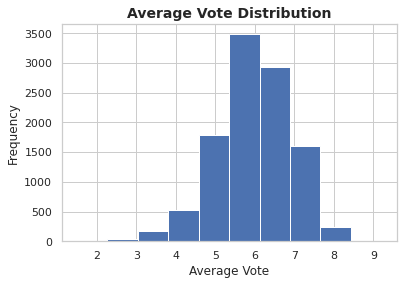

In [27]:
movies_rating.vote_average.hist() #rating ditribution
addTitleLabels("Average Vote" , "Frequency", "Average Vote Distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


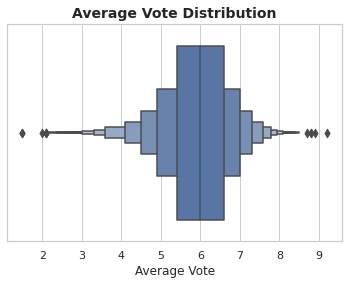

In [28]:
sns.boxenplot(movies_rating.vote_average)
addTitleLabels("Average Vote" , "", "Average Vote Distribution")

In [29]:
def std(x): #get standard deviation
    return np.std(x)


director_rating = movies_rating.groupby('director').agg(['mean', 'max', 'min','count', std]).reset_index() #for each director get the mean,max.min and count of his movies rates
director_rating[director_rating.vote_average["count"] > 2] #show only directors made more than 2 films

director vote_average                          
                                 mean  max  min count       std
10          Aaron Norris     5.120000  5.7  4.7     5  0.337046
19          Abel Ferrara     5.400000  6.3  4.2     8  0.644205
23           Adam Curtis     7.900000  8.3  7.6     3  0.294392
28         Adam Gierasch     4.233333  4.5  4.0     3  0.205480
29            Adam Green     5.400000  5.8  5.1     4  0.254951
...                  ...          ...  ...  ...   ...       ...
5032       Yves Simoneau     6.225000  6.8  5.4     4  0.521416
5043         Zack Snyder     6.566667  7.0  5.9     6  0.344803
5050         Zalman King     4.433333  4.6  4.3     3  0.124722
5059  Ãlex de la Iglesia     6.025000  6.5  5.6     4  0.349106
5065  Ã‰tienne Chatiliez     6.700000  7.2  5.7     3  0.707107

[1076 rows x 6 columns]

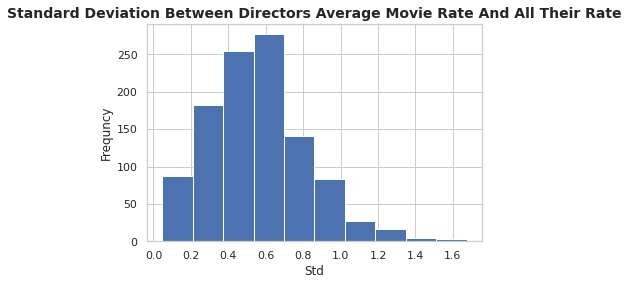

In [42]:
# get the rating standard deviations of movies for directors produced more than 2 films  
director_rating[director_rating.vote_average['count'] > 2].vote_average["std"].hist()
addTitleLabels("STD" , "Frequncy", "standard deviation between directors average movie rate and all their rate")

we can see that the standard deviation is skewed toward low values which indicate that the directors have average movie rating and you can be a little confident that this director movie will not deviate a lot about that average 

### Research Question 3  (Does gener of the movie gurantee a specific profit ?)

In [ ]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3844 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   revenue       3844 non-null   int64         
 1   budget        3844 non-null   int64         
 2   director      3844 non-null   object        
 3   genres        3844 non-null   object        
 4   release_date  3844 non-null   datetime64[ns]
 5   vote_average  3844 non-null   float64       
 6   profit        3844 non-null   int64         
 7   month         3844 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 270.3+ KB


any movie genre that is repeted only once is not beneficial 

In [33]:
movies_clean2 = movies_clean[['genres' , "profit" , "revenue"]]
movies_clean.genres.value_counts()

Drama                                           245
Comedy                                          232
Drama|Romance                                   107
Comedy|Romance                                  102
Comedy|Drama|Romance                             91
                                               ... 
Action|Comedy|Horror|Mystery|Science Fiction      1
Fantasy|Drama|Crime                               1
Fantasy|Drama|Comedy|Romance|Family               1
Action|Comedy|Thriller|Crime|Mystery              1
Drama|Thriller|Mystery|War                        1
Name: genres, Length: 1052, dtype: int64

In [34]:
movies_clean2['freq'] = movies_clean2.groupby('genres')['genres'].transform('count') #get me how many each genre was repedted and save it in a column called freq
movies_clean2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,genres,profit,revenue,freq
0,Action|Adventure|Science Fiction|Thriller,1363528810,1513528810,6
1,Action|Adventure|Science Fiction|Thriller,228436354,378436354,6
2,Adventure|Science Fiction|Thriller,185238201,295238201,1
3,Action|Adventure|Science Fiction|Fantasy,1868178225,2068178225,1
4,Action|Crime|Thriller,1316249360,1506249360,30
...,...,...,...,...
10822,Drama,26236689,33736689,245
10828,Mystery|Thriller,10000000,13000000,6
10829,Action|Western,1347000,6000000,2
10835,Action|Adventure|Drama|War|Romance,8000000,20000000,1


In [35]:
# keep only genres repeted more than 3 times to ensure correct correlation 
print(movies_clean2.shape)
movies_clean2 = movies_clean2[movies_clean2.freq > 3]
print(movies_clean2.shape)

(3844, 4)
(2667, 4)


In [36]:
# get average profit for each genre
avg_genre = movies_clean2.groupby('genres')['profit','revenue'].mean().reset_index()
avg_genre = avg_genre.sort_values("revenue" , ascending = False)
avg_genre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,genres,profit,revenue
12,Action|Adventure|Fantasy|Science Fiction,5.382059e+08,7.040630e+08
58,Adventure|Fantasy|Drama|Romance,5.887339e+08,6.574839e+08
59,Adventure|Fantasy|Family,4.799516e+08,6.079516e+08
33,Action|Science Fiction|Adventure,3.966971e+08,5.441971e+08
42,Adventure|Action|Science Fiction,4.332927e+08,5.226277e+08
...,...,...,...
7,Action|Adventure|Crime|Drama|Thriller,-4.655313e+06,2.194469e+07
96,Documentary,1.644862e+07,2.010971e+07
145,Horror|Science Fiction,9.183683e+06,1.746702e+07
174,War|Drama,-3.761484e+06,1.173852e+07


In [37]:
avg_genre[:10] # top 10 genres average revnue

,genres,profit,revenue
12,Action|Adventure|Fantasy|Science Fiction,5.382059e+08,7.040630e+08
58,Adventure|Fantasy|Drama|Romance,5.887339e+08,6.574839e+08
59,Adventure|Fantasy|Family,4.799516e+08,6.079516e+08
33,Action|Science Fiction|Adventure,3.966971e+08,5.441971e+08
42,Adventure|Action|Science Fiction,4.332927e+08,5.226277e+08
65,Animation|Comedy|Family|Adventure,4.322405e+08,5.142405e+08
56,Adventure|Fantasy|Action,3.880389e+08,5.064989e+08
11,Action|Adventure|Fantasy,3.308890e+08,5.000556e+08
47,Adventure|Animation|Comedy|Family|Fantasy,3.741361e+08,4.981361e+08
120,Drama|Romance|Thriller,4.289633e+08,4.978383e+08


In [38]:
pd.options.display.float_format = '{:.2f}'.format #converting scientific numbers to regular floats

In [39]:
avg_genre.revenue.describe().round(2)

count         176.00
mean    136461933.95
std     140735642.15
min      10761231.60
25%      52460948.03
50%      84901779.40
75%     140474293.96
max     704063018.71
Name: revenue, dtype: float64

In [ ]:
avg_genre.profit.describe().round(2)

count         176.00
mean     91890319.43
std     113649899.27
min     -10978536.00
25%      26629602.09
50%      52962692.28
75%      90159151.59
max     588733858.50
Name: profit, dtype: float64

There are big variation in the average revenue and profit for each genre is big which indicate that genres do not get same revenue nor profit

In [41]:
# top 10 and worst 10 genres by profit
avg_genre = avg_genre.sort_values("profit" , ascending = False)
print("top 10 genres by profit: \n", avg_genre[:10])
print("\n worst 10 genres by profit: \n", avg_genre[-10:])

top 10 genres by profit: 
                                         genres       profit      revenue
58             Adventure|Fantasy|Drama|Romance 588733858.50 657483858.50
12    Action|Adventure|Fantasy|Science Fiction 538205875.86 704063018.71
59                    Adventure|Fantasy|Family 479951648.40 607951648.40
42            Adventure|Action|Science Fiction 433292698.80 522627698.80
65           Animation|Comedy|Family|Adventure 432240488.50 514240488.50
120                     Drama|Romance|Thriller 428963339.75 497838339.75
33            Action|Science Fiction|Adventure 396697054.00 544197054.00
56                    Adventure|Fantasy|Action 388038903.73 506498903.73
130          Family|Animation|Adventure|Comedy 377254258.00 481254258.00
47   Adventure|Animation|Comedy|Family|Fantasy 374136147.60 498136147.60

 worst 10 genres by profit: 
                                     genres       profit     revenue
27                            Action|Drama   2125850.17 28709183.50
99 

We can see that profit does not correlate well with revenue so sometimes the movie make bad revenue compared with the budget of the movie

<a id='conclusions'></a>
## Conclusions

#### 1) Summer season is the best time to realse your movie at specially (5,6,7) monthes and take care that the revenue decrese at the start of the year were it's too cold to go out and at the 9th month with the start of the school year


#### 2) Directos have an average rate for their movies that theey stick with it with small variations and you can trust that the next movie for every directory with be very neer to his average rate and this was shown by the small standard deviation of the average rates

#### 3) Genre of the movie has a relation with the revenue and profit of the movie and i showed the best movie genres and worst in terms of the revenue and profit to know which genre should you make for your next movie and to take care of high budget that may make you loose money although good revenue

#### Limitations of analysis:
1) I wanted to compare the movies revenue to see the trend over years but the problem was the value of money is not the same since say 30 years and now so the dollar now may equal a half dollar 10 years ago so if there is a column to represent the value of the dollar in this year it would be beneficial 
2) some revenues and budget was very low like 1 dollar or 1000 dollars and so on which was not logical and i excluded any budget less than 10 dollars and reveue less than 1 dollar but the threshold should be more than this, i only kept this threshhold to keep some rows for analysis as the number of rows was small




Resources:
https://seaborn.pydata.org/generated/seaborn.barplot.html

https://stackoverflow.com/questions/25715333/in-python-plots-what-does-1e8-mean-in-reference-to-the-y-axis

https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column

https://stackoverflow.com/questions/25915225/pandas-dataframe-groupby-to-calculate-population-standard-deviation

https://stackoverflow.com/questions/57814242/count-freq-of-one-column-values-in-pandas-dataframe-and-tag-each-row-with-its-fr

https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results